In [1]:
import pandas as pd

# Dataset con dati mancanti rappresentati da None o NaN
dataset = [
    {"età": 25, "punteggio": 90, "ammesso": 1},
    {"età": None, "punteggio": 85, "ammesso": 0},
    {"età": 28, "punteggio": None, "ammesso": 1},
    {"età": None, "punteggio": 75, "ammesso": 1},
    {"età": 23, "punteggio": None, "ammesso": None},
    {"età": 23, "punteggio": 77, "ammesso": None},
]
df = pd.DataFrame(dataset)
df

,età,punteggio,ammesso
0,25.0,90.0,1.0
1,NaN,85.0,0.0
2,28.0,NaN,1.0
3,NaN,75.0,1.0
4,23.0,NaN,NaN
5,23.0,77.0,NaN


In [2]:
df[["punteggio", "ammesso"]]

,punteggio,ammesso
0,90.0,1.0
1,85.0,0.0
2,NaN,1.0
3,75.0,1.0
4,NaN,NaN
5,77.0,NaN


In [3]:
# Identificazione delle righe con dati mancanti
righe_con_dati_mancanti = df[df.isnull().any(axis=1)]
righe_con_dati_mancanti


,età,punteggio,ammesso
1,NaN,85.0,0.0
2,28.0,NaN,1.0
3,NaN,75.0,1.0
4,23.0,NaN,NaN
5,23.0,77.0,NaN


In [4]:
# Conta quante righe con dati mancanti ci sono in totale
totale_dati_mancanti = righe_con_dati_mancanti.shape[0]
totale_dati_mancanti

5

In [5]:
print("Righe con dati mancanti:")
print(righe_con_dati_mancanti)
print("Totale dati mancanti:", totale_dati_mancanti)

Righe con dati mancanti:
    età  punteggio  ammesso
1   NaN       85.0      0.0
2  28.0        NaN      1.0
3   NaN       75.0      1.0
4  23.0        NaN      NaN
5  23.0       77.0      NaN
Totale dati mancanti: 5


In [6]:
import pandas as pd

# Dataset con dati mancanti rappresentati da None o NaN
dataset = [
    {"nome": "Alice", "età": 25, "punteggio": 90, "email": "alice@email.com"},
    {"nome": "Bob", "età": 22, "punteggio": None, "email": None},
    {"nome": "Charlie", "età": 28, "punteggio": 75, "email": "charlie@email.com"},
]

# Converti il dataset in un DataFrame
df = pd.DataFrame(dataset)
df

,nome,età,punteggio,email
0,Alice,25,90.0,alice@email.com
1,Bob,22,NaN,None
2,Charlie,28,75.0,charlie@email.com


In [7]:
# Rimuovi le righe con dati mancanti
df1=df.dropna(inplace=False)
df1

,nome,età,punteggio,email
0,Alice,25,90.0,alice@email.com
2,Charlie,28,75.0,charlie@email.com


In [8]:
# Rimuovi le righe con dati mancanti
df.dropna(inplace=True)
df

,nome,età,punteggio,email
0,Alice,25,90.0,alice@email.com
2,Charlie,28,75.0,charlie@email.com


In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Genera dati di esempio
data = {
    'Variable1': [1, 2, 3, 4, 5],
    'Variable2': [1, 2, np.nan, 4, np.nan],
    'Missing_Column': ['A', 'B', 'A', 'C', np.nan]
}
# Crea un DataFrame
df = pd.DataFrame(data)
df1=pd.DataFrame()
df

,Variable1,Variable2,Missing_Column
0,1,1.0,A
1,2,2.0,B
2,3,NaN,A
3,4,4.0,C
4,5,NaN,NaN


In [10]:
# Trattamento dei missing values nelle variabili numeriche
numeric_cols = df.select_dtypes(include=['number'])
numeric_cols.columns

Index(['Variable1', 'Variable2'], dtype='object')

In [11]:
df1[numeric_cols.columns] = df[numeric_cols.columns].fillna(df[numeric_cols.columns].mean())
df1

,Variable1,Variable2
0,1,1.000000
1,2,2.000000
2,3,2.333333
3,4,4.000000
4,5,2.333333


In [12]:
# Trattamento dei missing values nelle variabili categoriche
categorical_cols = df.select_dtypes(exclude=['number'])
categorical_cols.columns

Index(['Missing_Column'], dtype='object')

In [13]:
df1[categorical_cols.columns] = df[categorical_cols.columns].fillna(df[categorical_cols.columns].mode().iloc[0])
df1

,Variable1,Variable2,Missing_Column
0,1,1.000000,A
1,2,2.000000,B
2,3,2.333333,A
3,4,4.000000,C
4,5,2.333333,A


In [14]:
print(f"il primo con i valori mancanti \n{df} \ne il secondo con i missing values sostituiti \n{df1}")

il primo con i valori mancanti 
   Variable1  Variable2 Missing_Column
0          1        1.0              A
1          2        2.0              B
2          3        NaN              A
3          4        4.0              C
4          5        NaN            NaN 
e il secondo con i missing values sostituiti 
   Variable1  Variable2 Missing_Column
0          1   1.000000              A
1          2   2.000000              B
2          3   2.333333              A
3          4   4.000000              C
4          5   2.333333              A


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Genera dati di esempio
data = {
    'Feature1': [1, 2, np.nan, 4, 5],
    'Feature2': [np.nan, 2, 3, 4, np.nan],
    'Feature3': [1, np.nan, 3, 4, 5]
}
# Crea un DataFrame
df = pd.DataFrame(data)
df

,Feature1,Feature2,Feature3
0,1.0,NaN,1.0
1,2.0,2.0,NaN
2,NaN,3.0,3.0
3,4.0,4.0,4.0
4,5.0,NaN,5.0


In [4]:
df.isnull().sum()

Feature1    0.2
Feature2    0.4
Feature3    0.2
dtype: float64

In [5]:
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent

Feature1    20.0
Feature2    40.0
Feature3    20.0
dtype: float64

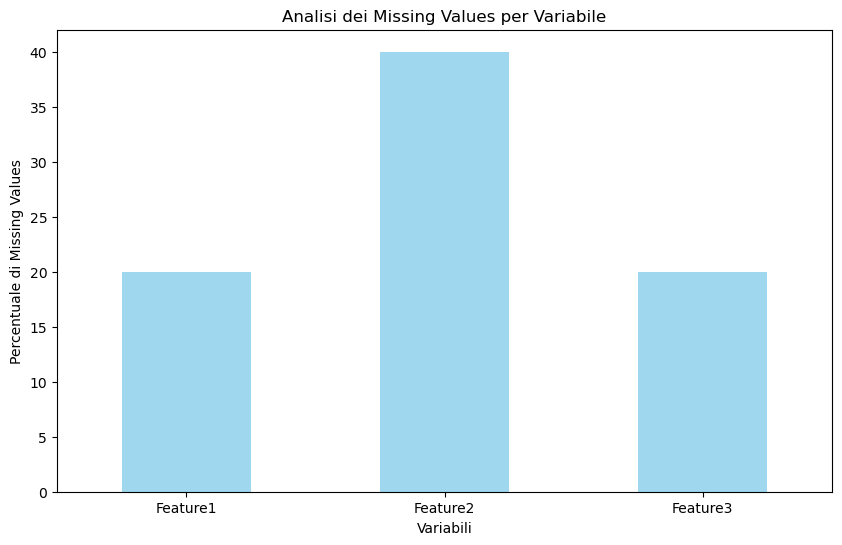

In [18]:
# Calcola la percentuale di righe con missing values per ciascuna variabile
# Crea il grafico a barre
plt.figure(figsize=(10, 6))
missing_percent.plot(kind='bar', color='skyblue',alpha=0.8)
plt.xlabel('Variabili')
plt.ylabel('Percentuale di Missing Values')
plt.title('Analisi dei Missing Values per Variabile')
plt.xticks(rotation=0)
plt.show()



In [19]:
#creo una funzione che si occupa solo dei missing values 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Genera dati di esempio
data = {
    'Variable1': [1, 2, 3, 4, 5],
    'Variable2': [1, 2, np.nan, 4, np.nan],
    'Missing_Column': ['A', 'B', 'A', 'C', np.nan]
}

# Crea un DataFrame
df = pd.DataFrame(data)
df1=pd.DataFrame()


def missingvalues_sub(df):
    # Trattamento dei missing values nelle variabili numeriche e categoriche
    numeric_cols = df.select_dtypes(include=['number'])
    categorical_cols = df.select_dtypes(exclude=['number'])
    df1[numeric_cols.columns] = df[numeric_cols.columns].fillna(df[numeric_cols.columns].mean())    
    df1[categorical_cols.columns] = df[categorical_cols.columns].fillna(df[categorical_cols.columns].mode().iloc[0])
    return df1


def main ():
    df1=missingvalues_sub(df)
    print(f"il primo con i valori mancanti \n{df} \ne il secondo con i missing values sostituiti \n{df1}")


if __name__ == "__main__":
    main()



il primo con i valori mancanti 
   Variable1  Variable2 Missing_Column
0          1        1.0              A
1          2        2.0              B
2          3        NaN              A
3          4        4.0              C
4          5        NaN            NaN 
e il secondo con i missing values sostituiti 
   Variable1  Variable2 Missing_Column
0          1   1.000000              A
1          2   2.000000              B
2          3   2.333333              A
3          4   4.000000              C
4          5   2.333333              A


In [20]:
df.isnull()

,Variable1,Variable2,Missing_Column
0,False,False,False
1,False,False,False
2,False,True,False
3,False,False,False
4,False,True,True


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Genera dati di esempio
data = {
    'Feature1': [1, 2, np.nan, 4, 5],
    'Feature2': [np.nan, 2, 3, 4, np.nan],
    'Feature3': [1, np.nan, 3, 4, 5]
}

# Crea un DataFrame
df = pd.DataFrame(data)

# Calcola la matrice di missing values
missing_matrix = df.isnull()
missing_matrix


,Feature1,Feature2,Feature3
0,False,True,False
1,False,False,True
2,True,False,False
3,False,False,False
4,False,True,False


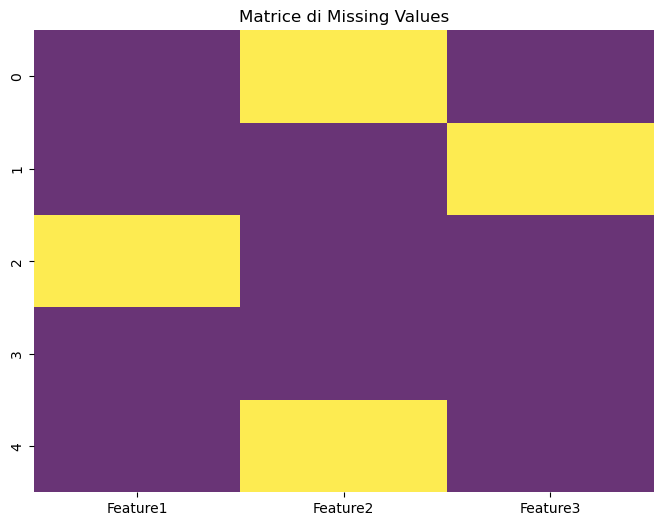

In [8]:
# Crea una heatmap colorata
plt.figure(figsize=(8, 6))
sns.heatmap(missing_matrix, cmap='viridis', cbar=False,alpha=0.8)
plt.title('Matrice di Missing Values')
plt.show()


In [7]:
#pip install plotly

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Genera dati casuali per l'+
np.random.seed(2)
data = {
    'Età': np.random.randint(18, 70, size=1000),
    'Genere': np.random.choice(['Maschio', 'Femmina'], size=1000),
    'Punteggio': np.random.uniform(0, 100, size=1000),
    'Reddito': np.random.normal(50000, 15000, size=1000)
}

df = pd.DataFrame(data)

# Visualizza le prime righe del dataset
print(df.head(37))

    Età   Genere  Punteggio       Reddito
0    58  Maschio  93.309731  55174.034340
1    33  Femmina  97.279382  65873.059029
2    63  Femmina  91.185842  63246.553249
3    26  Femmina  75.926276  44534.875858
4    40  Maschio  25.156395  73444.267270
5    61  Femmina  90.055564  48451.939402
6    36  Femmina  29.717079  44579.517216
7    29  Femmina  87.762886  74639.606864
8    58  Femmina   4.139801  84279.892767
9    25  Femmina   5.641115  52083.863707
10   52  Maschio  80.315899  58188.649042
11   67  Maschio  10.670863  40301.012748
12   49  Maschio  43.920719  58292.619116
13   29  Femmina  34.315554  54842.947703
14   39  Maschio  27.790752  53270.120207
15   65  Maschio  36.205126  78821.228153
16   49  Maschio  48.566180  59639.075018
17   44  Femmina  83.643168  39339.223303
18   38  Maschio  61.718371  40687.283872
19   55  Femmina  90.736827  66795.123408
20   57  Maschio  83.670954  66695.930851
21   21  Femmina  14.613108  13662.713756
22   56  Maschio  42.276431  43888

In [3]:
# Informazioni sul dataset
print(df.info())

# Statistiche descrittive
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Età        1000 non-null   int32  
 1   Genere     1000 non-null   object 
 2   Punteggio  1000 non-null   float64
 3   Reddito    1000 non-null   float64
dtypes: float64(2), int32(1), object(1)
memory usage: 27.5+ KB
None
               Età    Punteggio       Reddito
count  1000.000000  1000.000000   1000.000000
mean     44.205000    48.687071  50036.084395
std      14.986847    29.617200  15027.142896
min      18.000000     0.090182   6017.070033
25%      31.000000    22.373740  39577.758808
50%      44.000000    47.030664  50994.854630
75%      58.000000    75.439618  60933.234680
max      69.000000    99.713537  96435.848804


In [4]:
# Gestione dei valori mancanti
missing_data = df.isnull().sum()
print("Valori mancanti per ciascuna colonna:")
print(missing_data)

Valori mancanti per ciascuna colonna:
Età          0
Genere       0
Punteggio    0
Reddito      0
dtype: int64


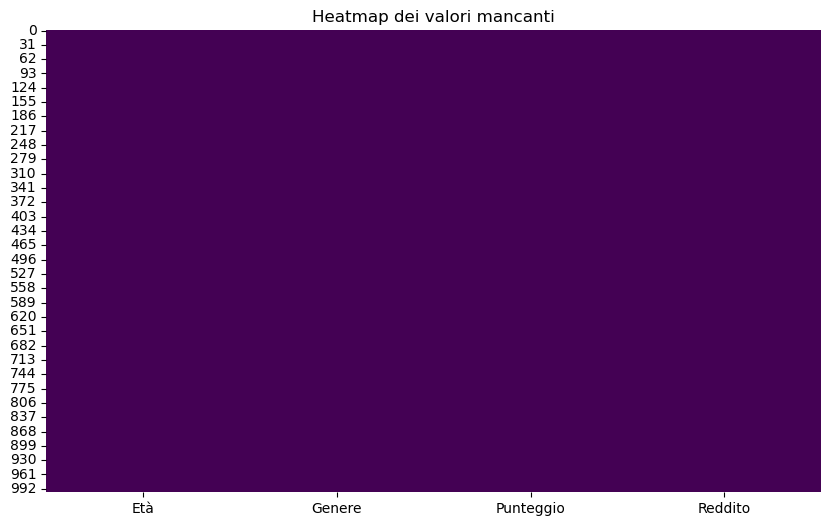

In [5]:
# Visualizza una heatmap dei valori mancanti
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap dei valori mancanti')
plt.show()


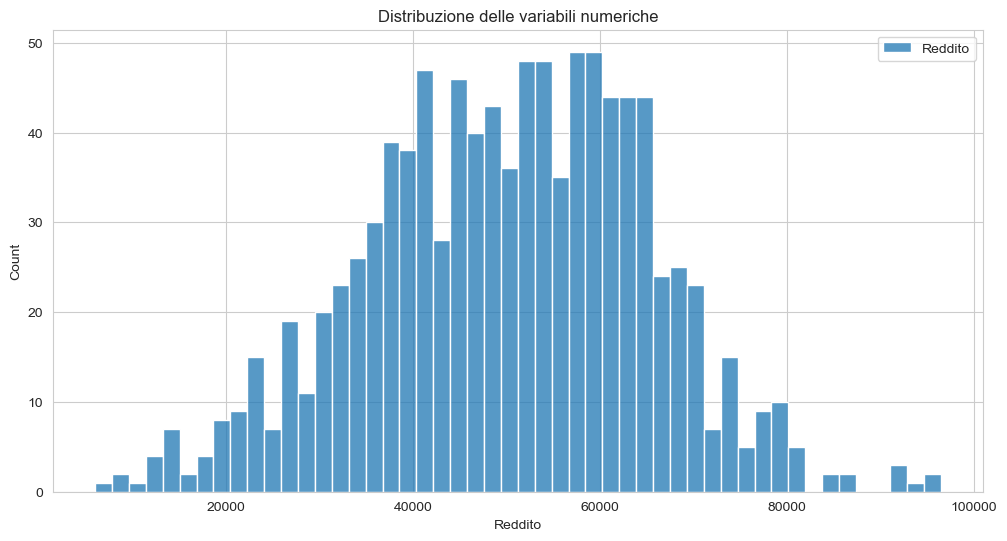

In [6]:
# Visualizza la distribuzione delle variabili numeriche
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.histplot(df["Reddito"], kde=False, bins=50, label="Reddito")
plt.legend()
plt.title('Distribuzione delle variabili numeriche')
plt.show()

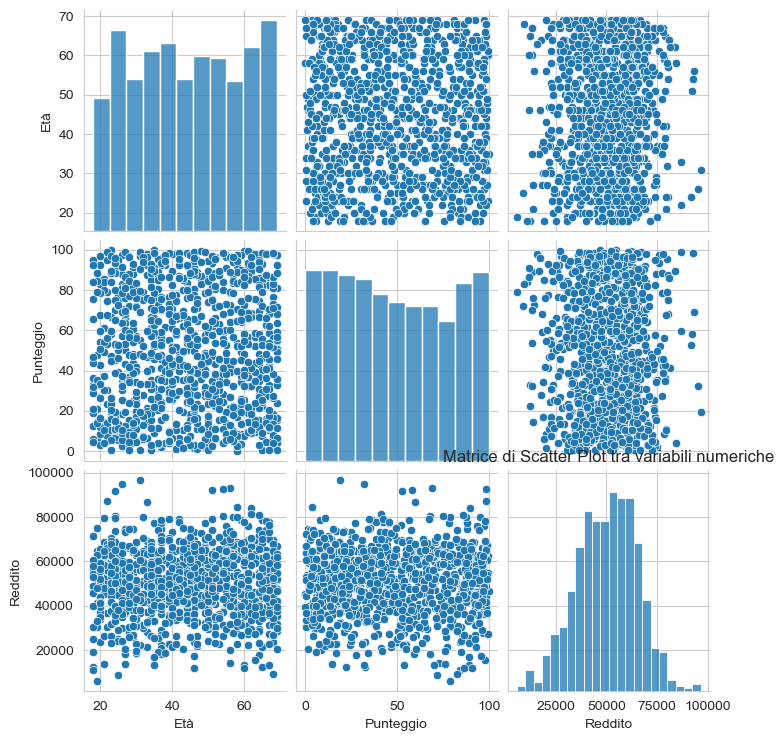

In [7]:
# Visualizza una matrice di scatter plot tra le variabili numeriche
numeric_features = df.select_dtypes(include=[np.number])
sns.pairplot(df[numeric_features.columns])
plt.title('Matrice di Scatter Plot tra variabili numeriche')
plt.show()


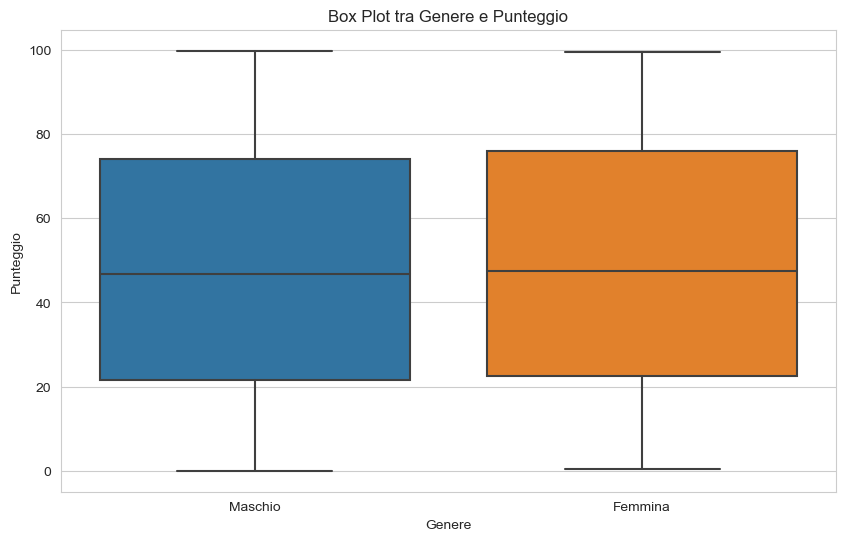

In [8]:
# Visualizza una box plot per una variabile numerica rispetto a una categorica
plt.figure(figsize=(10, 6))
sns.boxplot(x='Genere', y='Punteggio', data=df)
plt.title('Box Plot tra Genere e Punteggio')
plt.show()

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement plotl (from versions: none)
ERROR: No matching distribution found for plotl


In [12]:
# Visualizza un grafico a dispersione interattivo utilizzando Plotly
import plotly.express as px
fig = px.scatter(df, x='Età', y='Reddito', color='Genere', size='Punteggio')
fig.update_layout(title='Grafico a dispersione interattivo')
fig.show()


        Data  Vendite Prodotto
0 2023-01-01      985        C
1 2023-01-02      232        B
2 2023-01-03      912        C
3 2023-01-04      456        B
4 2023-01-05      458        A


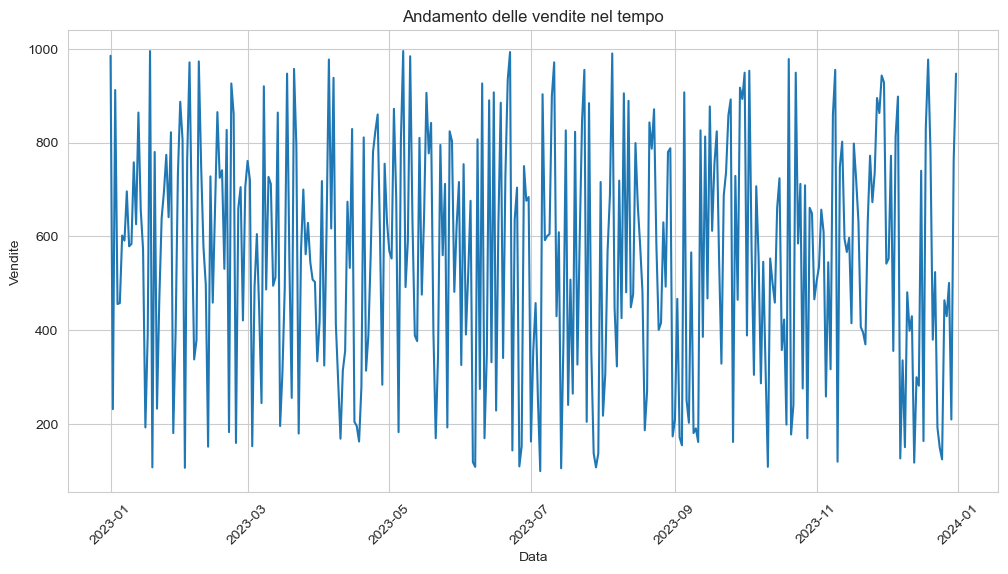

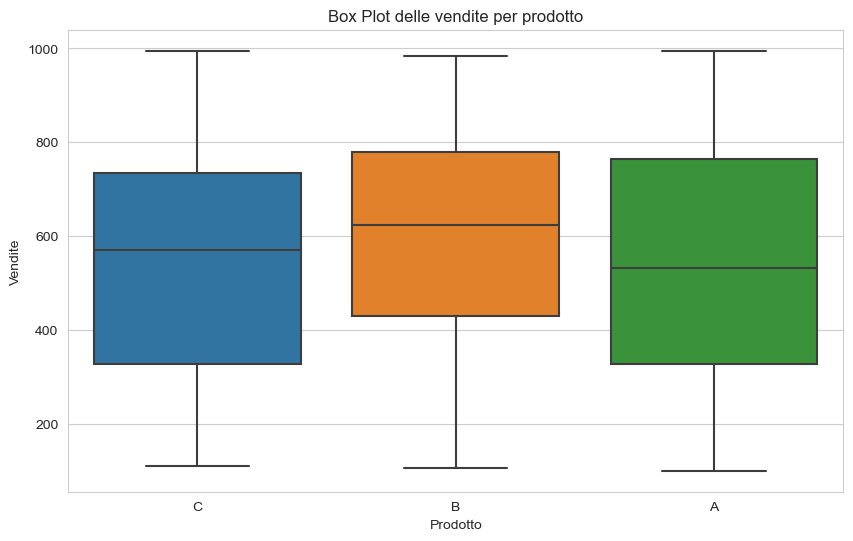

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Genera dati casuali per l'esplorazione
np.random.seed(22)
data = {
    'Data': pd.date_range(start='2023-01-01', end='2023-12-31', freq='D'),
    'Vendite': np.random.randint(100, 1000, size=365),
    'Prodotto': np.random.choice(['A', 'B', 'C'], size=365)
}

df = pd.DataFrame(data)

# Visualizza le prime righe del dataset
print(df.head())

# Visualizza un grafico delle vendite nel tempo
plt.figure(figsize=(12, 6))
sns.lineplot(x='Data', y='Vendite', data=df)
plt.title('Andamento delle vendite nel tempo')
plt.xlabel('Data')
plt.ylabel('Vendite')
plt.xticks(rotation=45)
plt.show()

# Visualizza una box plot delle vendite per prodotto
plt.figure(figsize=(10, 6))
sns.boxplot(x='Prodotto', y='Vendite', data=df)
plt.title('Box Plot delle vendite per prodotto')
plt.xlabel('Prodotto')
plt.ylabel('Vendite')
plt.show()


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Genera dati di esempio
data = {
    'Numeric_Var': [1, 2, 3, 4, np.nan, 6],
    'Categorical_Var': ['A', 'B', 'A', 'B', 'A', 'B']
}

# Crea un DataFrame
df = pd.DataFrame(data)
print(df)

   Numeric_Var Categorical_Var
0          1.0               A
1          2.0               B
2          3.0               A
3          4.0               B
4          NaN               A
5          6.0               B


In [16]:
# Calcola la media condizionata 
conditional_means = df['Numeric_Var'].fillna(df.groupby('Categorical_Var')['Numeric_Var'].transform('mean'))

   Numeric_Var Categorical_Var
0          1.0               A
1          2.0               B
2          3.0               A
3          4.0               B
4          2.0               A
5          6.0               B


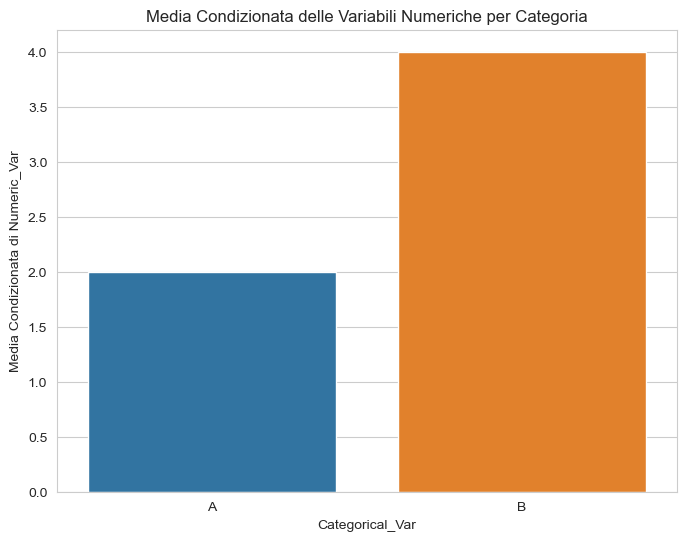

In [34]:
# Aggiorna la colonna Numeric_Var con la media condizionata
df['Numeric_Var'] = conditional_means
print(df)

# Crea un grafico a barre per mostrare la media condizionata per ogni categoria
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Categorical_Var', y='Numeric_Var', ci=False)
plt.xlabel('Categorical_Var')
plt.ylabel('Media Condizionata di Numeric_Var')
plt.title('Media Condizionata delle Variabili Numeriche per Categoria')
plt.show()



     Età        Soddisfazione
0     56    Molto Soddisfatto
1     46  Molto Insoddisfatto
2     32               Neutro
3     60               Neutro
4     25  Molto Insoddisfatto
..   ...                  ...
495   37    Molto Soddisfatto
496   41    Molto Soddisfatto
497   29    Molto Soddisfatto
498   52    Molto Soddisfatto
499   50    Molto Soddisfatto

[500 rows x 2 columns]
     Età        Soddisfazione  Numeric_Var
0     56    Molto Soddisfatto    41.651376
1     46  Molto Insoddisfatto    40.054054
2     32               Neutro    41.747368
3     60               Neutro    41.747368
4     25  Molto Insoddisfatto    40.054054
..   ...                  ...          ...
495   37    Molto Soddisfatto    41.651376
496   41    Molto Soddisfatto    41.651376
497   29    Molto Soddisfatto    41.651376
498   52    Molto Soddisfatto    41.651376
499   50    Molto Soddisfatto    41.651376

[500 rows x 3 columns]


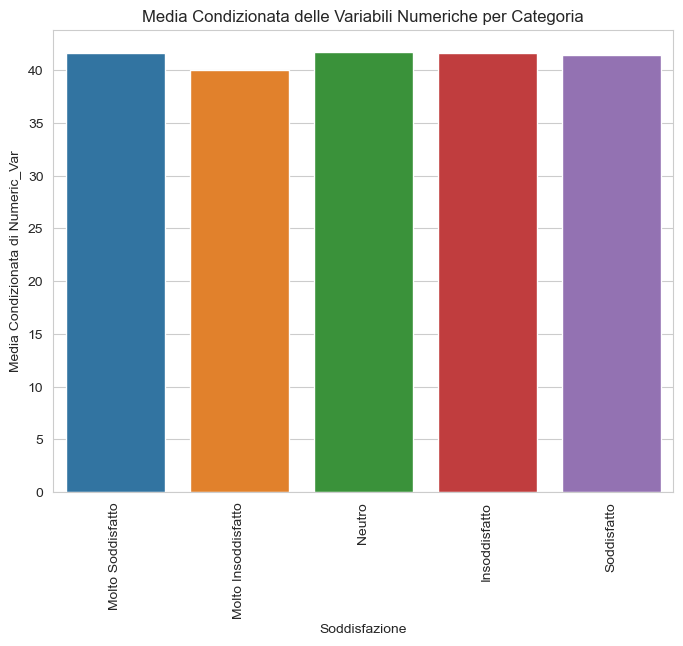

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Genera dati casuali per l'esplorazione
np.random.seed(42)
data = {
    'Età': np.random.randint(18, 65, size=500),
    'Soddisfazione': 
    np.random.choice(['Molto Soddisfatto', 'Soddisfatto', 'Neutro', 'Insoddisfatto', 'Molto Insoddisfatto'], size=500)
}

df = pd.DataFrame(data)
print(df)
conditional_means = df.groupby('Soddisfazione')['Età'].transform('mean')

df['Numeric_Var'] = conditional_means
print(df)

# Crea un grafico a barre per mostrare la media condizionata per ogni categoria
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Soddisfazione', y='Numeric_Var', ci=None)
plt.xlabel('Soddisfazione')
plt.ylabel('Media Condizionata di Numeric_Var')
plt.title('Media Condizionata delle Variabili Numeriche per Categoria')
plt.xticks(rotation=90)

plt.show()


   Età        Soddisfazione  Numeric_Var
0   56    Molto Soddisfatto    41.651376
1   46  Molto Insoddisfatto    40.054054
2   32               Neutro    41.747368
3   60               Neutro    41.747368
4   25  Molto Insoddisfatto    40.054054


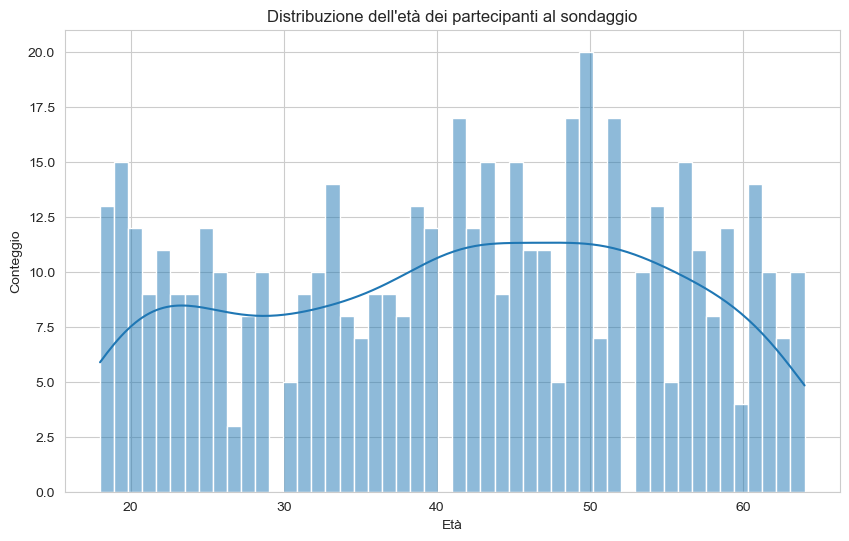

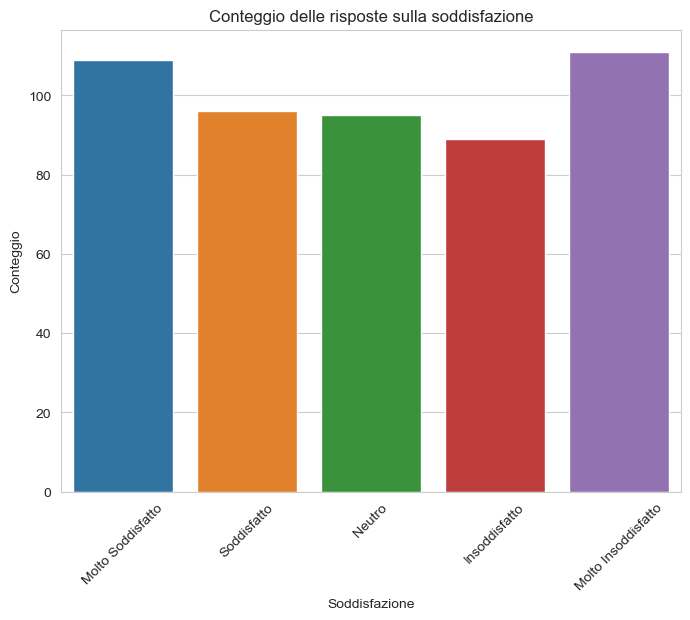

In [37]:
# Visualizza le prime righe del dataset
print(df.head())

# Visualizza una distribuzione dell'età
plt.figure(figsize=(10, 6))
sns.histplot(df['Età'], bins=50, kde=True)
plt.title('Distribuzione dell\'età dei partecipanti al sondaggio')
plt.xlabel('Età')
plt.ylabel('Conteggio')
plt.show()

# Visualizza un conteggio delle risposte sulla soddisfazione
plt.figure(figsize=(8, 6))
sns.countplot(x='Soddisfazione', data=df, order=['Molto Soddisfatto', 'Soddisfatto', 'Neutro', 'Insoddisfatto', 'Molto Insoddisfatto'])
plt.title('Conteggio delle risposte sulla soddisfazione')
plt.xlabel('Soddisfazione')
plt.ylabel('Conteggio')
plt.xticks(rotation=45)
plt.show()


In [38]:
np.random.rand(100, 5)

array([[3.91482110e-01, 5.31857480e-01, 6.66191124e-02, 2.29025391e-01,
        5.42849311e-01],
       [4.31528143e-01, 3.32815786e-01, 7.30549137e-01, 6.93717607e-01,
        1.66730760e-01],
       [8.78629115e-01, 4.95423626e-01, 7.41460911e-01, 5.73150849e-01,
        9.97692616e-01],
       [7.52403120e-01, 7.06980461e-01, 7.78571939e-01, 1.43127986e-01,
        2.04544593e-01],
       [7.14064082e-01, 4.93981487e-01, 7.54635292e-01, 1.02916031e-01,
        5.36481351e-01],
       [3.78821566e-01, 4.57000219e-01, 6.03957872e-01, 5.02288347e-01,
        5.39860637e-01],
       [4.86357482e-01, 4.08955177e-01, 7.71881981e-01, 1.22030723e-02,
        5.98442701e-01],
       [5.65508347e-01, 7.16179075e-01, 5.99029365e-01, 8.26798828e-01,
        9.59074795e-01],
       [3.42524257e-01, 2.27350983e-01, 4.23596862e-01, 2.87929616e-01,
        6.14950263e-01],
       [9.11852409e-01, 1.39116194e-01, 1.00794603e-01, 2.56015532e-01,
        7.26095586e-01],
       [5.92962905e-01, 1.0221

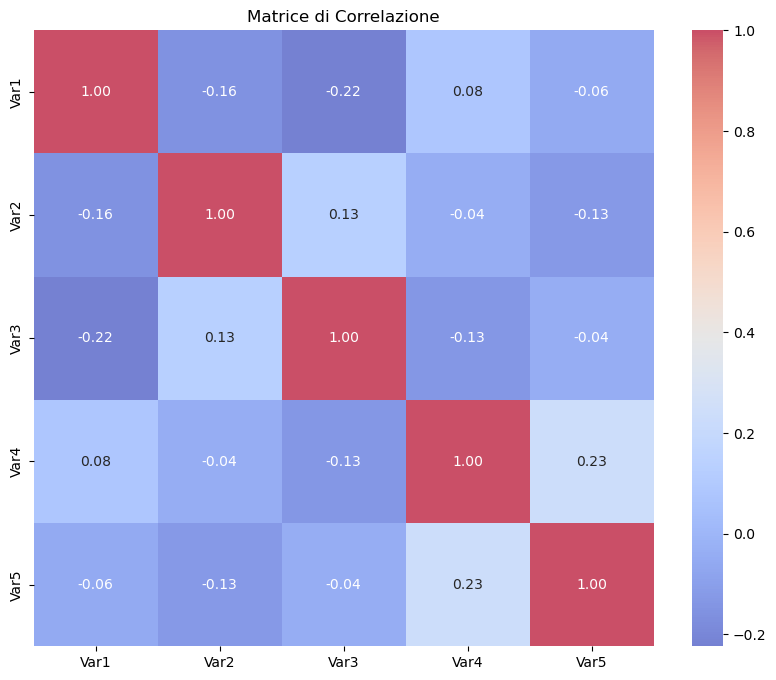

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Genera un dataset di esempio con variabili numeriche
np.random.seed(42)
data = pd.DataFrame(np.random.rand(100, 5), columns=['Var1', 'Var2', 'Var3', 'Var4', 'Var5'])

# Aggiungi alcune variabili categoriche generate casualmente
data['Categoria1'] = np.random.choice(['A', 'B', 'C'], size=100)
data['Categoria2'] = np.random.choice(['X', 'Y'], size=100)

# Calcola la matrice di correlazione tra tutte le variabili numeriche
correlation_matrix = data.corr()

# Visualizza la matrice di correlazione come heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",alpha=0.7)
plt.title("Matrice di Correlazione")
plt.show()

In [1]:
import pandas as pd
import numpy as np

# Impostare il seed per rendere i risultati riproducibili
np.random.seed(41)

# Creare un dataframe vuoto
df = pd.DataFrame()

# Generare dati casuali
n_rows = 10000
df['CatCol1'] = np.random.choice(['A', 'B', 'C'], size=n_rows)
df['CatCol2'] = np.random.choice(['X', 'Y'], size=n_rows)
df['NumCol1'] = np.random.randn(n_rows)
df['NumCol2'] = np.random.randint(1, 100, size=n_rows)
df['NumCol3'] = np.random.uniform(0, 1, size=n_rows)

# Calcolare il numero totale di missing values desiderati
total_missing_values = int(0.03 * n_rows * len(df.columns))

# Introdurre missing values casuali
for column in df.columns:
    num_missing_values = np.random.randint(0, total_missing_values + 1)
    missing_indices = np.random.choice(n_rows, size=num_missing_values, replace=False)
    df.loc[missing_indices, column] = np.nan
df

,CatCol1,CatCol2,NumCol1,NumCol2,NumCol3
0,A,NaN,0.440877,49.0,0.246007
1,A,Y,1.945879,28.0,0.936825
2,C,X,0.988834,42.0,0.751516
3,A,Y,-0.181978,73.0,0.950696
4,B,X,2.080615,74.0,0.903045
...,...,...,...,...,...
9995,C,Y,1.352114,61.0,0.728445
9996,C,Y,1.143642,67.0,0.605930
9997,A,X,-0.665794,54.0,0.071041
9998,C,Y,0.004278,NaN,NaN


In [2]:
# Identificazione delle righe con dati mancanti
righe_con_dati_mancanti = df[df.isnull().any(axis=1)]
len(righe_con_dati_mancanti)

3648

In [3]:
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent


CatCol1     0.29
CatCol2    10.63
NumCol1     9.67
NumCol2    10.48
NumCol3    12.69
dtype: float64

In [4]:
# Crea il grafico a barre
plt.figure(figsize=(10, 6))
missing_percent.plot(kind='bar', color='skyblue',alpha=0.8)
plt.xlabel('Variabili')
plt.ylabel('Percentuale di Missing Values')
plt.title('Analisi dei Missing Values per Variabile')
plt.xticks(rotation=45)
plt.show()

NameError: name 'plt' is not defined

In [ ]:
missing_matrix = df.isnull()

# Crea una heatmap colorata
plt.figure(figsize=(8, 6))
sns.heatmap(missing_matrix, cmap='viridis', cbar=False,alpha=0.8)
plt.title('Matrice di Missing Values')
plt.xticks(rotation=90)

plt.show()

In [ ]:
# Visualizza la distribuzione delle variabili numeriche
numeric_features = df.select_dtypes(include=[np.number])
# Visualizza una matrice di scatter plot tra le variabili numeriche
sns.pairplot(df[numeric_features.columns])
plt.title('Matrice di Scatter Plot tra variabili numeriche')
plt.show()


In [5]:
# Elimina le righe in cui entrambe le features categoriche hanno valori NaN
df = df.dropna(subset=["CatCol1", 'CatCol2'], how='all')
df

,CatCol1,CatCol2,NumCol1,NumCol2,NumCol3
0,A,NaN,0.440877,49.0,0.246007
1,A,Y,1.945879,28.0,0.936825
2,C,X,0.988834,42.0,0.751516
3,A,Y,-0.181978,73.0,0.950696
4,B,X,2.080615,74.0,0.903045
...,...,...,...,...,...
9995,C,Y,1.352114,61.0,0.728445
9996,C,Y,1.143642,67.0,0.605930
9997,A,X,-0.665794,54.0,0.071041
9998,C,Y,0.004278,NaN,NaN


In [47]:
df = df.dropna(subset=["NumCol1", "NumCol2","NumCol3"], how='all')
df

,CatCol1,CatCol2,NumCol1,NumCol2,NumCol3
0,A,NaN,0.440877,49.0,0.246007
1,A,Y,1.945879,28.0,0.936825
2,C,X,0.988834,42.0,0.751516
3,A,Y,-0.181978,73.0,0.950696
4,B,X,2.080615,74.0,0.903045
...,...,...,...,...,...
9995,C,Y,1.352114,61.0,0.728445
9996,C,Y,1.143642,67.0,0.605930
9997,A,X,-0.665794,54.0,0.071041
9998,C,Y,0.004278,NaN,NaN


In [48]:
numeric_cols = df.select_dtypes(include=['number'])
categorical_cols = df.select_dtypes(exclude=['number'])

# Sostituisci i missing values nelle colonne categoriche con la moda utilizzando .loc
df.loc[:, categorical_cols.columns] = df[categorical_cols.columns].fillna(df[categorical_cols.columns].mode().iloc[0])

# Calcola la media condizionata solo per le colonne numeriche con dati mancanti
conditional_means = df[numeric_cols.columns].fillna(df.groupby('CatCol1')[numeric_cols.columns].transform('mean'))

# Aggiorna le colonne numeriche con la media condizionata utilizzando .loc
df.loc[:, numeric_cols.columns] = conditional_means

# Stampa il DataFrame risultante
print(df)



     CatCol1 CatCol2   NumCol1    NumCol2   NumCol3
0          A       Y  0.440877  49.000000  0.246007
1          A       Y  1.945879  28.000000  0.936825
2          C       X  0.988834  42.000000  0.751516
3          A       Y -0.181978  73.000000  0.950696
4          B       X  2.080615  74.000000  0.903045
...      ...     ...       ...        ...       ...
9995       C       Y  1.352114  61.000000  0.728445
9996       C       Y  1.143642  67.000000  0.605930
9997       A       X -0.665794  54.000000  0.071041
9998       C       Y  0.004278  49.845018  0.489352
9999       A       X  0.622473  95.000000  0.751384

[9975 rows x 5 columns]


C:\Users\utente\AppData\Local\Temp\ipykernel_13024\1333295202.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\utente\AppData\Local\Temp\ipykernel_13024\1333295202.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [49]:
import pandas as pd
import numpy as np

# Impostare il seed per rendere i risultati riproducibili
np.random.seed(41)

# Creare un dataframe vuoto
df = pd.DataFrame()

# Generare dati casuali
n_rows = 10000000
df['CatCol1'] = np.random.choice(['A', 'B', 'C'], size=n_rows)
df['CatCol2'] = np.random.choice(['X', 'Y'], size=n_rows)
df['NumCol1'] = np.random.randn(n_rows)
df['NumCol2'] = np.random.randint(1, 100, size=n_rows)
df['NumCol3'] = np.random.uniform(0, 1, size=n_rows)

# Calcolare il numero totale di missing values desiderati
total_missing_values = int(0.05 * n_rows * len(df.columns))

# Introdurre missing values casuali
for column in df.columns:
    num_missing_values = np.random.randint(0, total_missing_values + 1)
    missing_indices = np.random.choice(n_rows, size=num_missing_values, replace=False)
    df.loc[missing_indices, column] = np.nan

# Elimina le righe in cui entrambe le features categoriche hanno valori NaN
df = df.dropna(subset=["CatCol1", 'CatCol2'], how='all')
df = df.dropna(subset=["NumCol1", 'NumCol2','NumCol3'], how='all')


numeric_cols = df.select_dtypes(include=['number'])
categorical_cols = df.select_dtypes(exclude=['number'])

# Sostituisci i missing values nelle colonne categoriche con la moda utilizzando .loc
df.loc[:, categorical_cols.columns] = df[categorical_cols.columns].fillna(df[categorical_cols.columns].mode().iloc[0])

# Calcola la media condizionata solo per le colonne numeriche con dati mancanti
conditional_means = df[numeric_cols.columns].fillna(df.groupby('CatCol1')[numeric_cols.columns].transform('mean'))

# Aggiorna le colonne numeriche con la media condizionata utilizzando .loc
df.loc[:, numeric_cols.columns] = conditional_means

# Stampa il DataFrame risultante
print(df)



        CatCol1 CatCol2   NumCol1  NumCol2   NumCol3
0             A       Y -0.391604     98.0  0.409815
1             A       X  0.000551     19.0  0.886592
2             C       Y  1.266001     52.0  0.848556
3             A       X  0.449617     70.0  0.546525
4             B       X  0.742505     72.0  0.467257
...         ...     ...       ...      ...       ...
9999995       A       Y  0.464663      7.0  0.992815
9999996       A       X  0.149775     13.0  0.731368
9999997       C       Y -0.608376      1.0  0.606349
9999998       C       Y  0.000101     69.0  0.115812
9999999       B       Y  1.666715     76.0  0.245699

[9635330 rows x 5 columns]
